<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

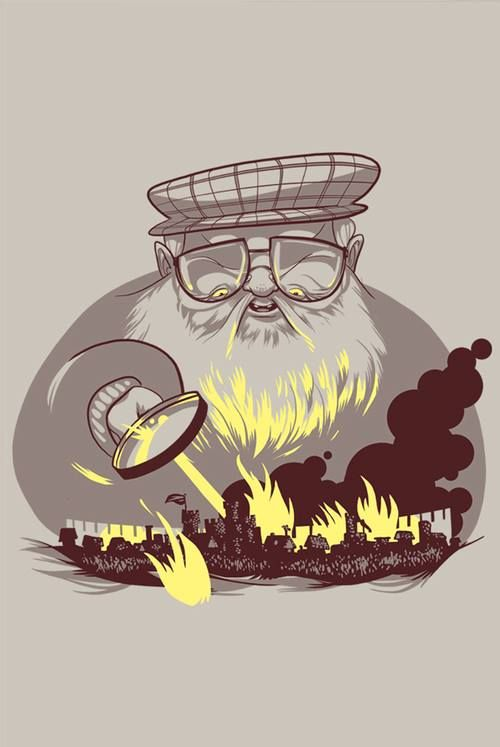

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1394]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1395]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [1396]:
data = pl.read_csv('game_of_thrones_train.csv')
test = pl.read_csv('game_of_thrones_test.csv')

In [1397]:
data

S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
i64,str,str,i64,str,f64,str,str,str,str,str,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,i64,f64,i64
1,"""Viserys II Targaryen""",null,1,null,null,"""Rhaenyra Targaryen""","""Daemon Targaryen""","""Aegon IV Targaryen""",null,null,0,0,0,0,0,1.0,0.0,0.0,null,0,0,null,11,0.605351,0
2,"""Walder Frey""","""Lord of the Crossing""",1,"""Rivermen""",208.0,null,null,null,"""House Frey""","""Perra Royce""",1,1,1,1,1,null,null,null,1.0,1,1,97.0,1,0.896321,1
3,"""Addison Hill""","""Ser""",1,null,null,null,null,null,"""House Swyft""",null,0,0,0,1,0,null,null,null,null,0,1,null,0,0.267559,1
4,"""Aemma Arryn""","""Queen""",0,null,82.0,null,null,null,"""House Arryn""","""Viserys I Targaryen""",0,0,0,0,0,null,null,null,0.0,1,1,23.0,0,0.183946,0
5,"""Sylva Santagar""","""Greenstone""",0,"""Dornish""",276.0,null,null,null,"""House Santagar""","""Eldon Estermont""",0,0,0,1,0,null,null,null,1.0,1,1,29.0,0,0.043478,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1553,"""Marwyn""","""Archmaester""",1,null,null,null,null,null,null,null,1,0,1,1,0,null,null,null,null,0,1,null,0,0.160535,1
1554,"""Masha Heddle""",null,0,null,null,null,null,null,null,null,1,1,0,0,0,null,null,null,null,0,0,null,0,0.040134,0
1555,"""Matthos Seaworth""",null,1,null,null,null,null,null,"""House Seaworth""",null,0,1,1,1,1,null,null,null,null,0,0,null,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [1398]:

data.select(pl.all().is_null()).sum()

S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,840,0,1069,1278,1539,1535,1536,381,1357,0,0,0,0,0,1539,1535,1536,1357,0,0,1278,0,0,0


In [1399]:
data.shape

(1557, 26)

In [1400]:
baseline = data.drop(['dateOfBirth', 'mother', 'father', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'heir'])

In [1401]:
baseline.sample(10)

S.No,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
i64,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64
1543,"""Lucas Blackwood""",null,1,null,"""House Blackwood""",0,1,1,1,1,0,0,null,0,0.073579,0
324,"""Arron""",null,1,null,"""Night's Watch""",0,0,1,1,1,0,0,null,0,0.043478,1
304,"""Allyria Dayne""",null,0,null,"""House Dayne""",0,0,1,0,0,0,0,null,0,0.023411,1
24,"""Willum""","""Ser""",1,null,null,1,0,0,0,0,0,1,null,0,0.0,1
366,"""Bharbo""","""Khal""",0,"""Dothraki""",null,1,0,0,0,0,0,0,null,2,0.003344,1
1430,"""Walda Rivers""",null,0,null,"""House Frey""",0,1,1,1,0,0,0,11.0,0,0.033445,1
1313,"""Rhogoro""","""Khalakka""",1,"""Dothraki""",null,1,0,0,1,0,0,1,null,0,0.010033,1
308,"""Alyn Hunt""","""Ser""",1,null,"""House Hunt""",0,0,0,1,0,0,1,null,0,0.013378,1
1332,"""Ronald Connington""","""Knight of Griffin's Roost""",1,null,"""House Connington""",0,0,0,0,1,0,1,null,0,0.033445,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [1402]:
baseline = baseline.with_columns(
    pl.when(pl.col('popularity') > 0.5)
    .then(1)
    .otherwise(0)
    .alias('isPopular')
).with_columns(
    pl.when(pl.col('numDeadRelations') > 0)
    .then(1)
    .otherwise(0)
    .alias('boolDeadRelations')
)

In [1403]:
baseline.sample(10)

S.No,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
i64,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
1420,"""Unella""","""Septa""",0,null,"""Faith of the Seven""",0,0,0,1,1,0,0,null,0,0.020067,1,0,0
83,"""Reynard Webber""","""Lord of Coldmoat""",0,null,"""House Webber""",0,0,0,0,0,0,1,null,0,0.006689,1,0,0
1094,"""Hobber Redwyne""","""Ser""",1,"""Reach""","""House Redwyne""",1,1,1,1,1,0,1,null,0,0.214047,1,0,0
85,"""Rhaegel Targaryen""","""Prince of Dragonstone""",1,"""Valyrian""","""House Targaryen""",0,0,0,0,0,1,1,42.0,3,0.09699,0,0,1
941,"""Boremund Harlaw""","""Harridan Hill""",1,"""Ironborn""","""House Harlaw of Harridan Hill""",0,0,0,1,1,0,1,null,0,0.063545,1,0,0
1223,"""Medger Cerwyn""","""Cerwyn""",1,"""Northmen""","""House Cerwyn""",1,1,0,0,0,0,1,null,1,0.063545,0,0,1
1481,"""Clayton Suggs""","""Ser""",1,null,"""House Suggs""",0,0,0,1,1,0,1,null,0,0.043478,1,0,0
703,"""Lewys Piper""",null,1,"""Rivermen""","""House Piper""",0,0,0,1,1,0,0,null,0,0.033445,1,0,0
266,"""Wendello Qar Deeth""",null,0,"""Qartheen""",null,0,1,0,0,0,0,0,null,0,0.010033,1,0,0


In [1404]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [1405]:
data = {
    'culture': [], 
    'variants': []
}

for culture, variants in cult.items():
    for variant in variants:
        data['culture'].append(culture)
        data['variants'].append(variant)

# Создаем DataFrame
df = pl.DataFrame(data)

In [1406]:
df

culture,variants
str,str
"""Summer Islands""","""summer islands"""
"""Summer Islands""","""summer islander"""
"""Summer Islands""","""summer isles"""
"""Ghiscari""","""ghiscari"""
"""Ghiscari""","""ghiscaricari"""
…,…
"""Qartheen""","""qartheen"""
"""Qartheen""","""qarth"""
"""Reach""","""the reach"""


In [1407]:
baseline = (baseline.join(df,
              left_on=pl.col('culture').str.to_lowercase(), 
              right_on='variants',
              how='left')
 .with_columns(
     pl.when(pl.col('culture_right').is_null())
     .then(pl.col('culture'))
     .otherwise(pl.col('culture_right'))
     .alias('culture')
 )
 ).drop(['culture_right', 'variants'])

In [1408]:
baseline.sample(5)

S.No,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
i64,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
1202,"""Maegelle Frey""",null,0,null,"""House Frey""",0,1,1,1,0,1,0,56.0,0,0.107023,1,0,0
60,"""Quentyn Blackwood""","""Lord""",0,null,"""House Blackwood""",0,0,0,0,0,0,1,null,0,0.020067,0,0,0
703,"""Lewys Piper""",null,1,"""Rivermen""","""House Piper""",0,0,0,1,1,0,0,null,0,0.033445,1,0,0
1132,"""Jon Myre""",null,0,"""Ironborn""","""House Myre""",0,0,1,1,1,0,0,null,0,0.023411,1,0,0
306,"""Alyce""",null,1,null,null,0,0,1,1,0,0,0,null,0,0.006689,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [1409]:
baseline.select(pl.all().is_null()).sum()

S.No,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,840,0,1069,381,0,0,0,0,0,0,0,1278,0,0,0,0,0


In [1410]:
numerical_cols = [
    'male', 
    'book1', 'book2', 'book3', 'book4', 'book5',
    'isMarried', 'isNoble',
    'age', 'numDeadRelations',
    'popularity', 'isPopular'
]

# Создаем DataFrame с корреляциями
correlations = []
for col in numerical_cols:
    corr = baseline.select([
        pl.col('isAlive'),
        pl.col(col)
    ]).corr().item(0, 1)  # Берем значение корреляции между столбцами
    correlations.append({'feature': col, 'correlation': corr})

# Создаем DataFrame из результатов и сортируем
pl.DataFrame(correlations).sort('correlation', descending=True)

feature,correlation
str,f64
"""age""",NaN
"""book4""",0.284014
"""book5""",0.032531
"""book3""",0.018427
"""isMarried""",-0.049381
…,…
"""book1""",-0.112468
"""isPopular""",-0.118673
"""male""",-0.14829


In [1411]:
baseline = baseline.drop(['S.No', 'name'])

In [1412]:
baseline.head()

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
null,1,null,null,0,0,0,0,0,0,0,null,11,0.605351,0,1,1
"""Lord of the Crossing""",1,"""Rivermen""","""House Frey""",1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
"""Ser""",1,null,"""House Swyft""",0,0,0,1,0,0,1,null,0,0.267559,1,0,0
"""Queen""",0,null,"""House Arryn""",0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
"""Greenstone""",0,"""Dornish""","""House Santagar""",0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [1413]:
baseline.select(pl.col('isAlive')).dtypes

[Int64]

In [1414]:
# Подсчитаем количество объектов каждого класса
(baseline
    .group_by('isAlive')
    .agg(pl.len().alias('count'))
    .with_columns([
        (pl.col('count') / pl.col('count').sum() * 100).alias('percentage')
    ])
)

isAlive,count,percentage
i64,u32,f64
1,1212,77.842004
0,345,22.157996


In [1415]:
baseline.select(pl.all().is_null()).sum()

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
840,0,1069,381,0,0,0,0,0,0,0,1278,0,0,0,0,0


In [1416]:
baseline = baseline.with_columns(
    pl.col('title').fill_null('Unknown').alias('title'),
    pl.col('culture').fill_null('Unknown').alias('culture'),
    pl.col('house').fill_null('Unknown').alias('house'), 
    pl.col('age').fill_null(pl.col('age').mean()).alias('age'),
    
    
    
)

In [1417]:
import polars.selectors as cs
# Получаем список числовых колонок
numeric_cols = baseline.select(cs.numeric())

In [1418]:
numeric_cols.head(3)

male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
1,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
1,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
1,0,0,0,1,0,0,1,35.290323,0,0.267559,1,0,0


In [1419]:
baseline.head()

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
"""Unknown""",1,"""Unknown""","""Unknown""",0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
"""Lord of the Crossing""",1,"""Rivermen""","""House Frey""",1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
"""Ser""",1,"""Unknown""","""House Swyft""",0,0,0,1,0,0,1,35.290323,0,0.267559,1,0,0
"""Queen""",0,"""Unknown""","""House Arryn""",0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
"""Greenstone""",0,"""Dornish""","""House Santagar""",0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [1420]:
cat_cols = baseline.select(cs.string()).columns
cat_cols

['title', 'culture', 'house']

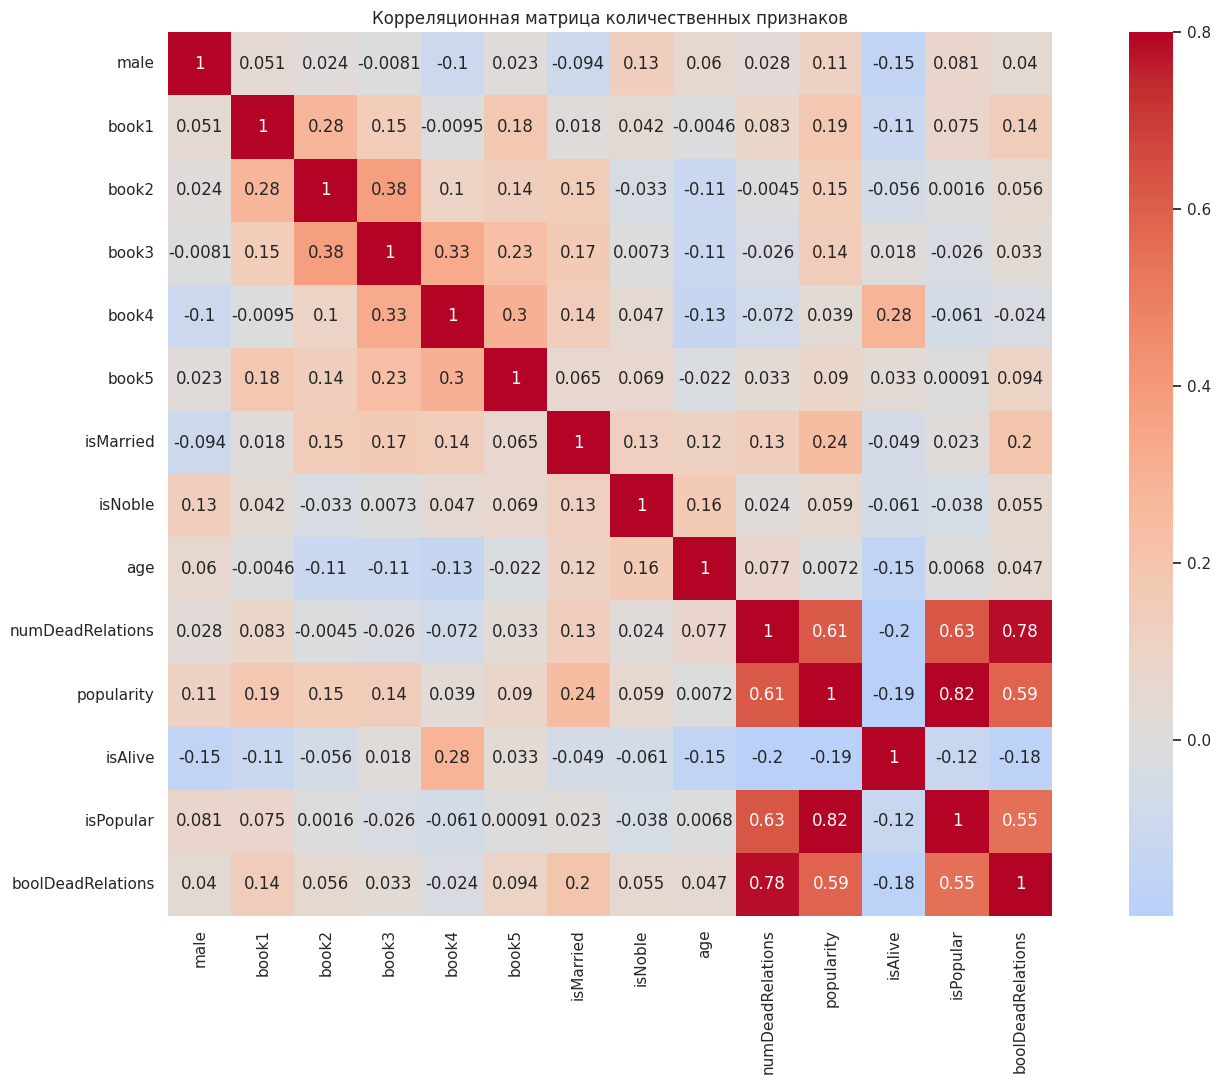

In [1421]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

# Устанавливаем стиль seaborn на "white"
sns.set_theme(style="whitegrid")

# Создаем корреляционную матрицу
correlation_matrix = baseline.select(numeric_cols).to_pandas().corr()

# Визуализируем корреляционную матрицу с помощью seaborn
plt.figure(figsize=(16, 11))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Показывать значения корреляции
    cmap='coolwarm',  # Цветовая схема
    center=0,  # Центр цветовой шкалы
    vmax=0.8,  # Максимальное значение для цветовой шкалы
    square=True  # Квадратные ячейки
)

plt.title('Корреляционная матрица количественных признаков')
plt.tight_layout()
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

isalive лучше всего коррелирует с book 4 , также есть отрицательная связь с полом и популярностью

In [1422]:
baseline.select(cs.string())

title,culture,house
str,str,str
"""Unknown""","""Unknown""","""Unknown"""
"""Lord of the Crossing""","""Rivermen""","""House Frey"""
"""Ser""","""Unknown""","""House Swyft"""
"""Queen""","""Unknown""","""House Arryn"""
"""Greenstone""","""Dornish""","""House Santagar"""
…,…,…
"""Archmaester""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""","""House Seaworth"""


In [1423]:

from scipy.stats import chi2_contingency


# Получаем список категориальных колонок
cat_cols = baseline.select(cs.string()).columns

# Преобразуем в pandas для удобства анализа
baseline_pd = baseline.to_pandas()

# 1. Статистический анализ (Хи-квадрат тест)
print("Статистический анализ связи:\n")
for col in cat_cols:
    # Создаем таблицу сопряженности
    contingency_table = pd.crosstab(baseline_pd[col], baseline_pd['isAlive'])
    # Проводим хи-квадрат тест
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"\nПризнак: {col}")
    print(f"Хи-квадрат статистика: {chi2:.2f}")
    print(f"p-значение: {p_value:.4f}")
    print("-" * 50)


Статистический анализ связи:


Признак: title
Хи-квадрат статистика: 289.05
p-значение: 0.0000
--------------------------------------------------

Признак: culture
Хи-квадрат статистика: 120.40
p-значение: 0.0000
--------------------------------------------------

Признак: house
Хи-квадрат статистика: 392.48
p-значение: 0.0019
--------------------------------------------------


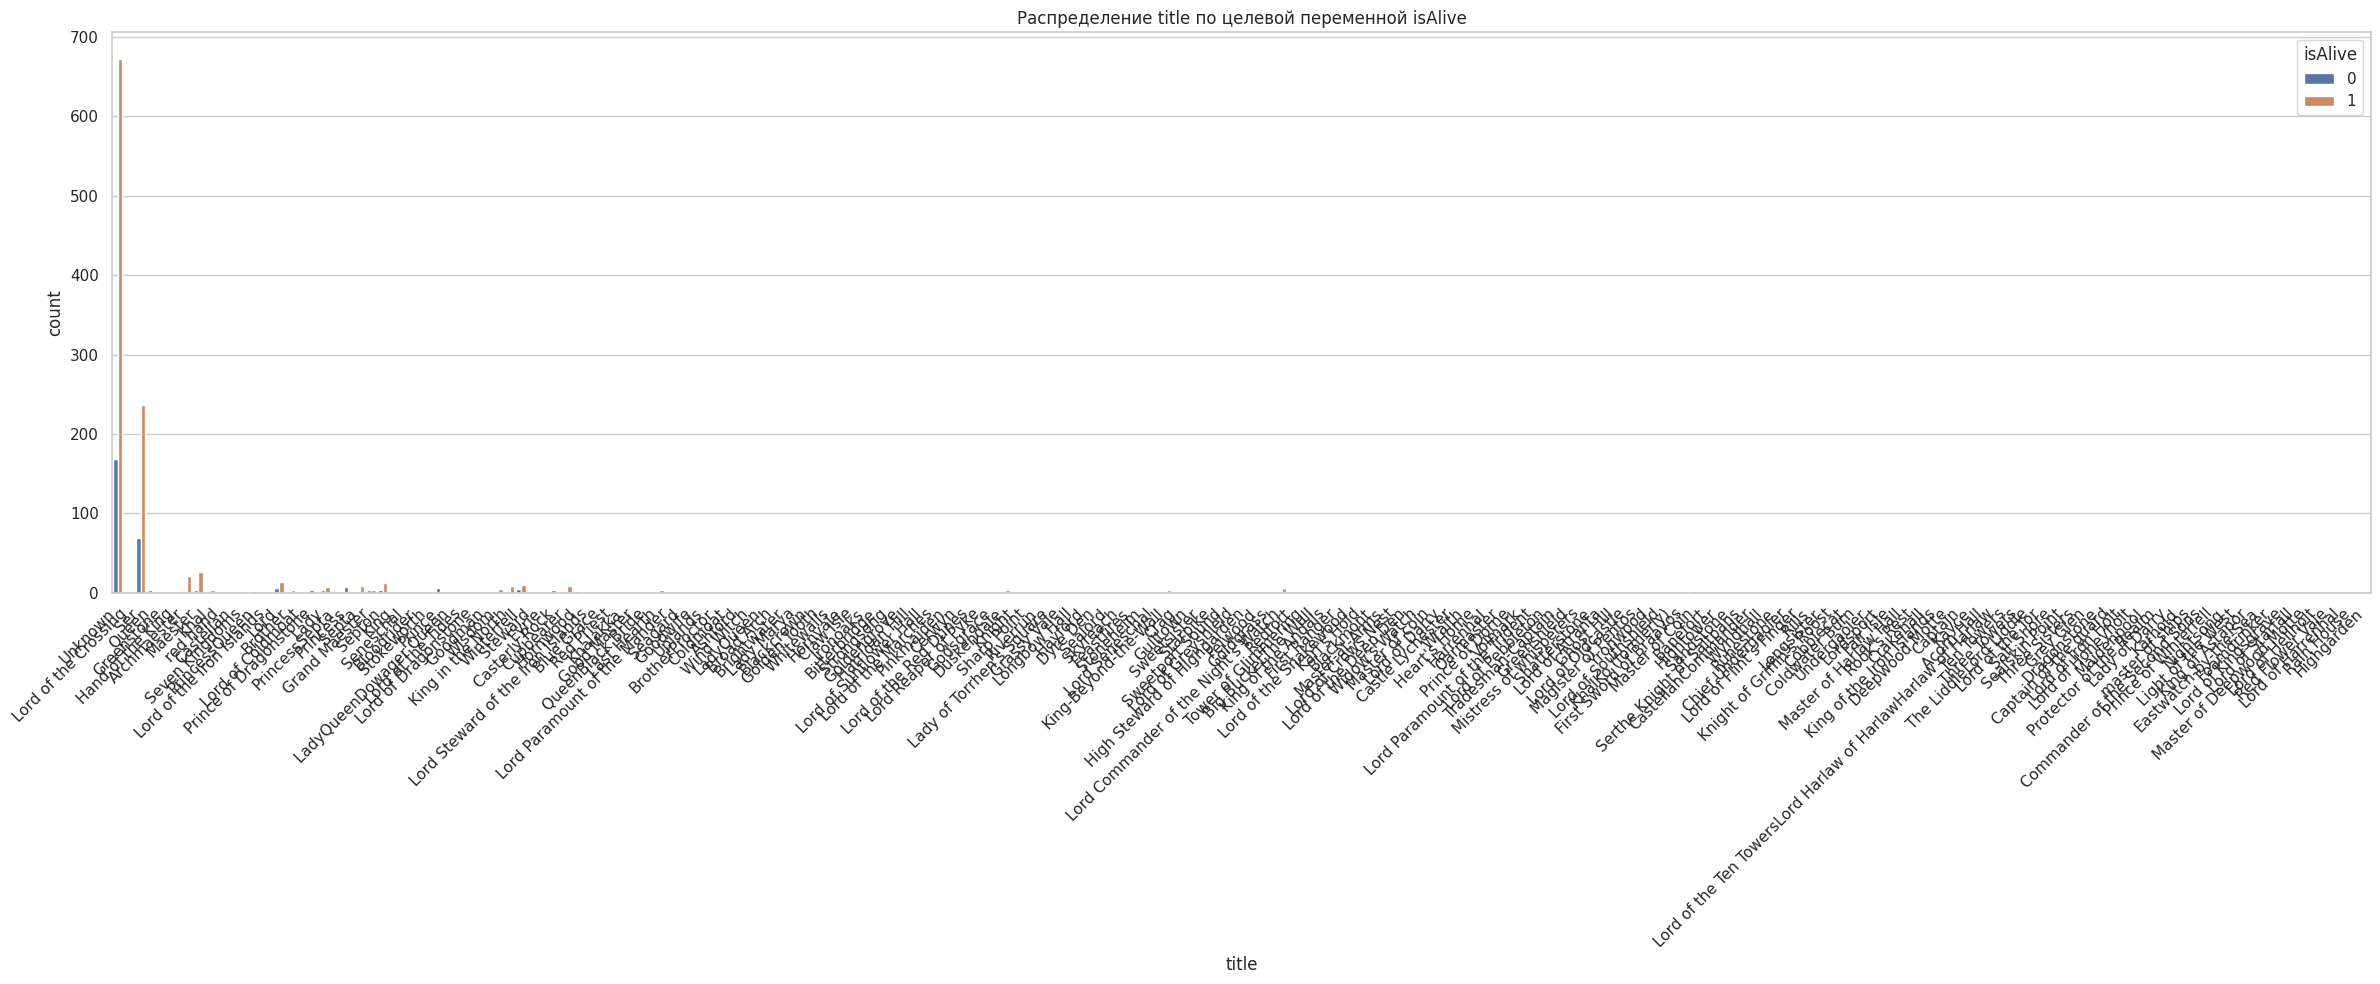

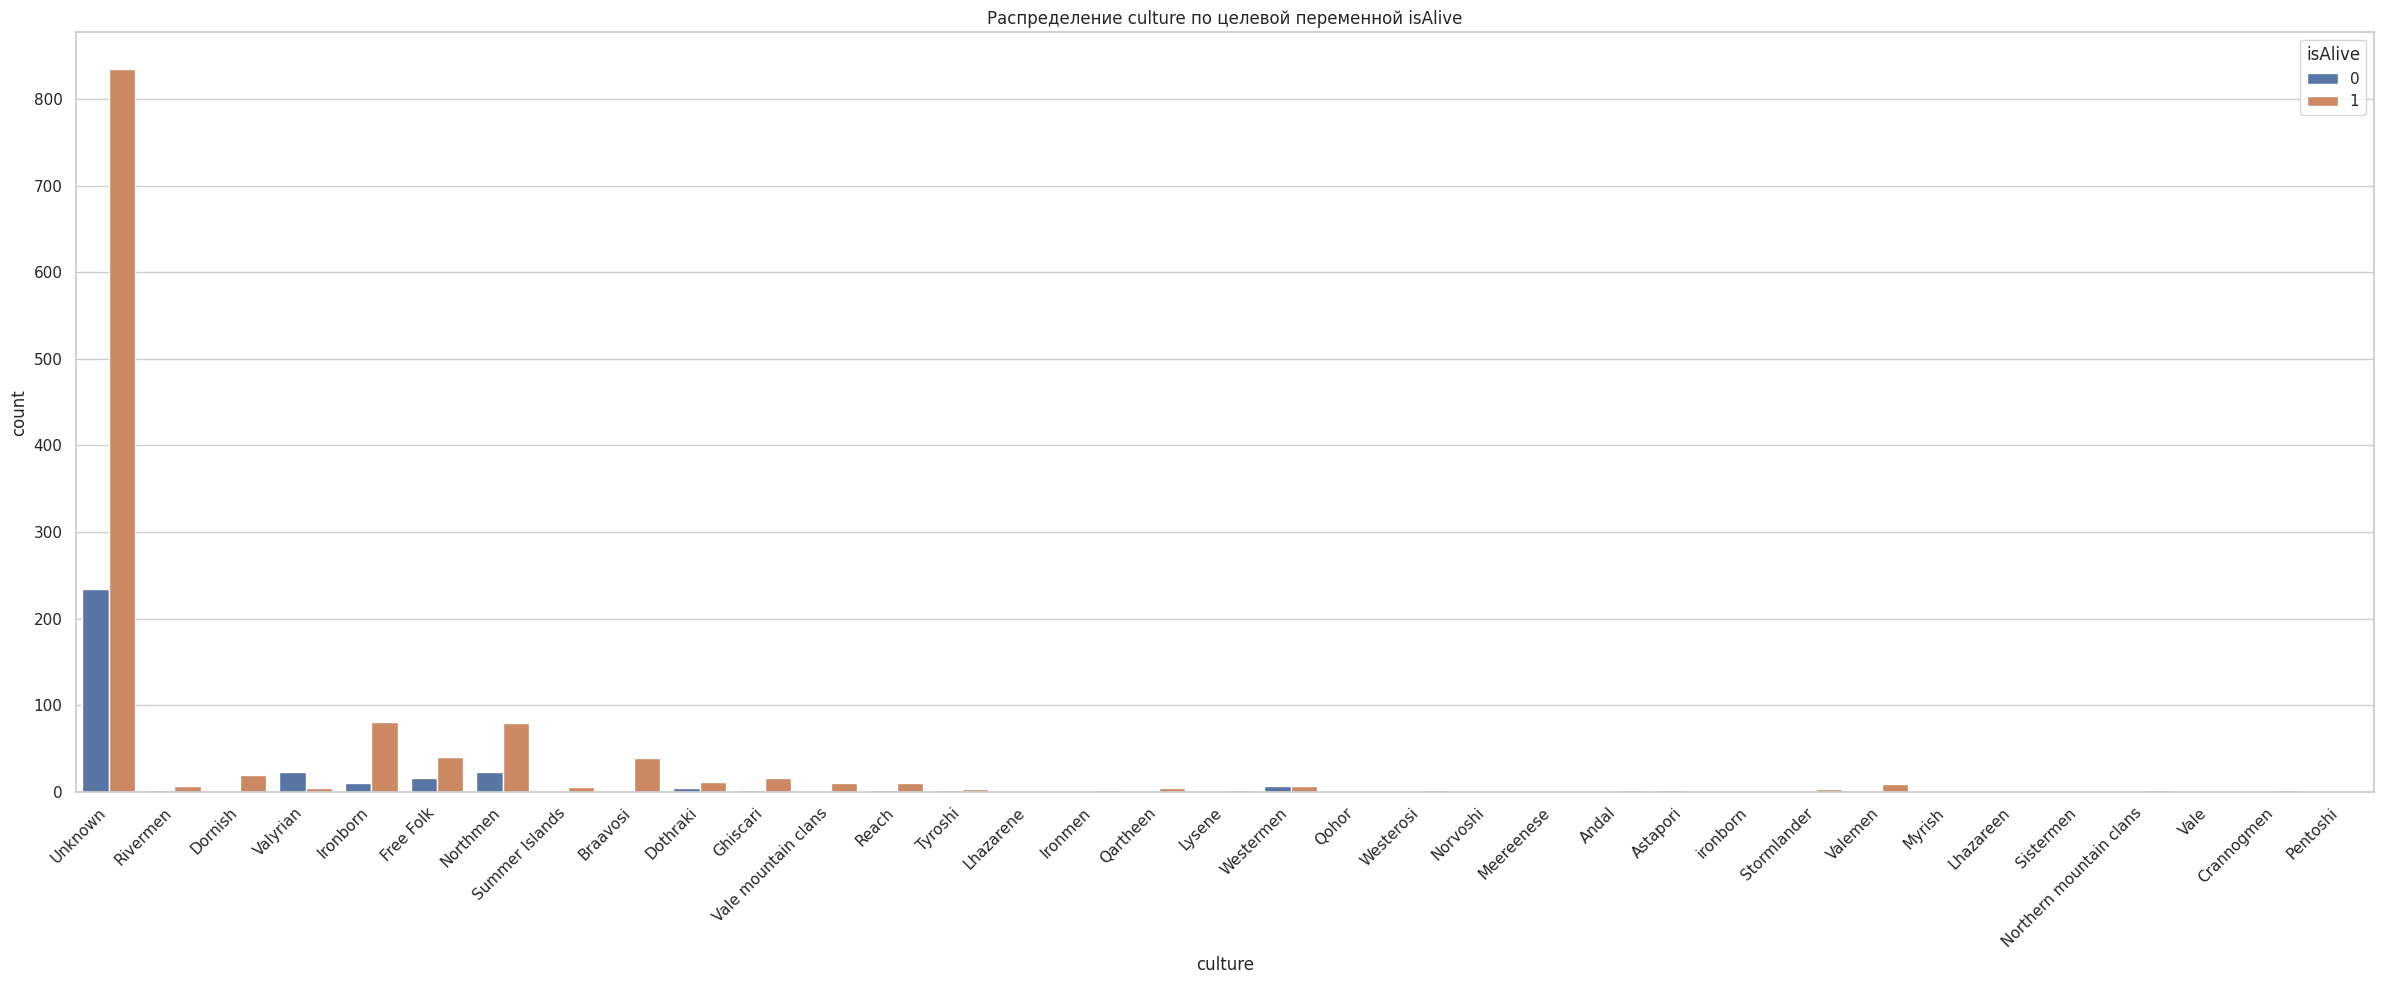

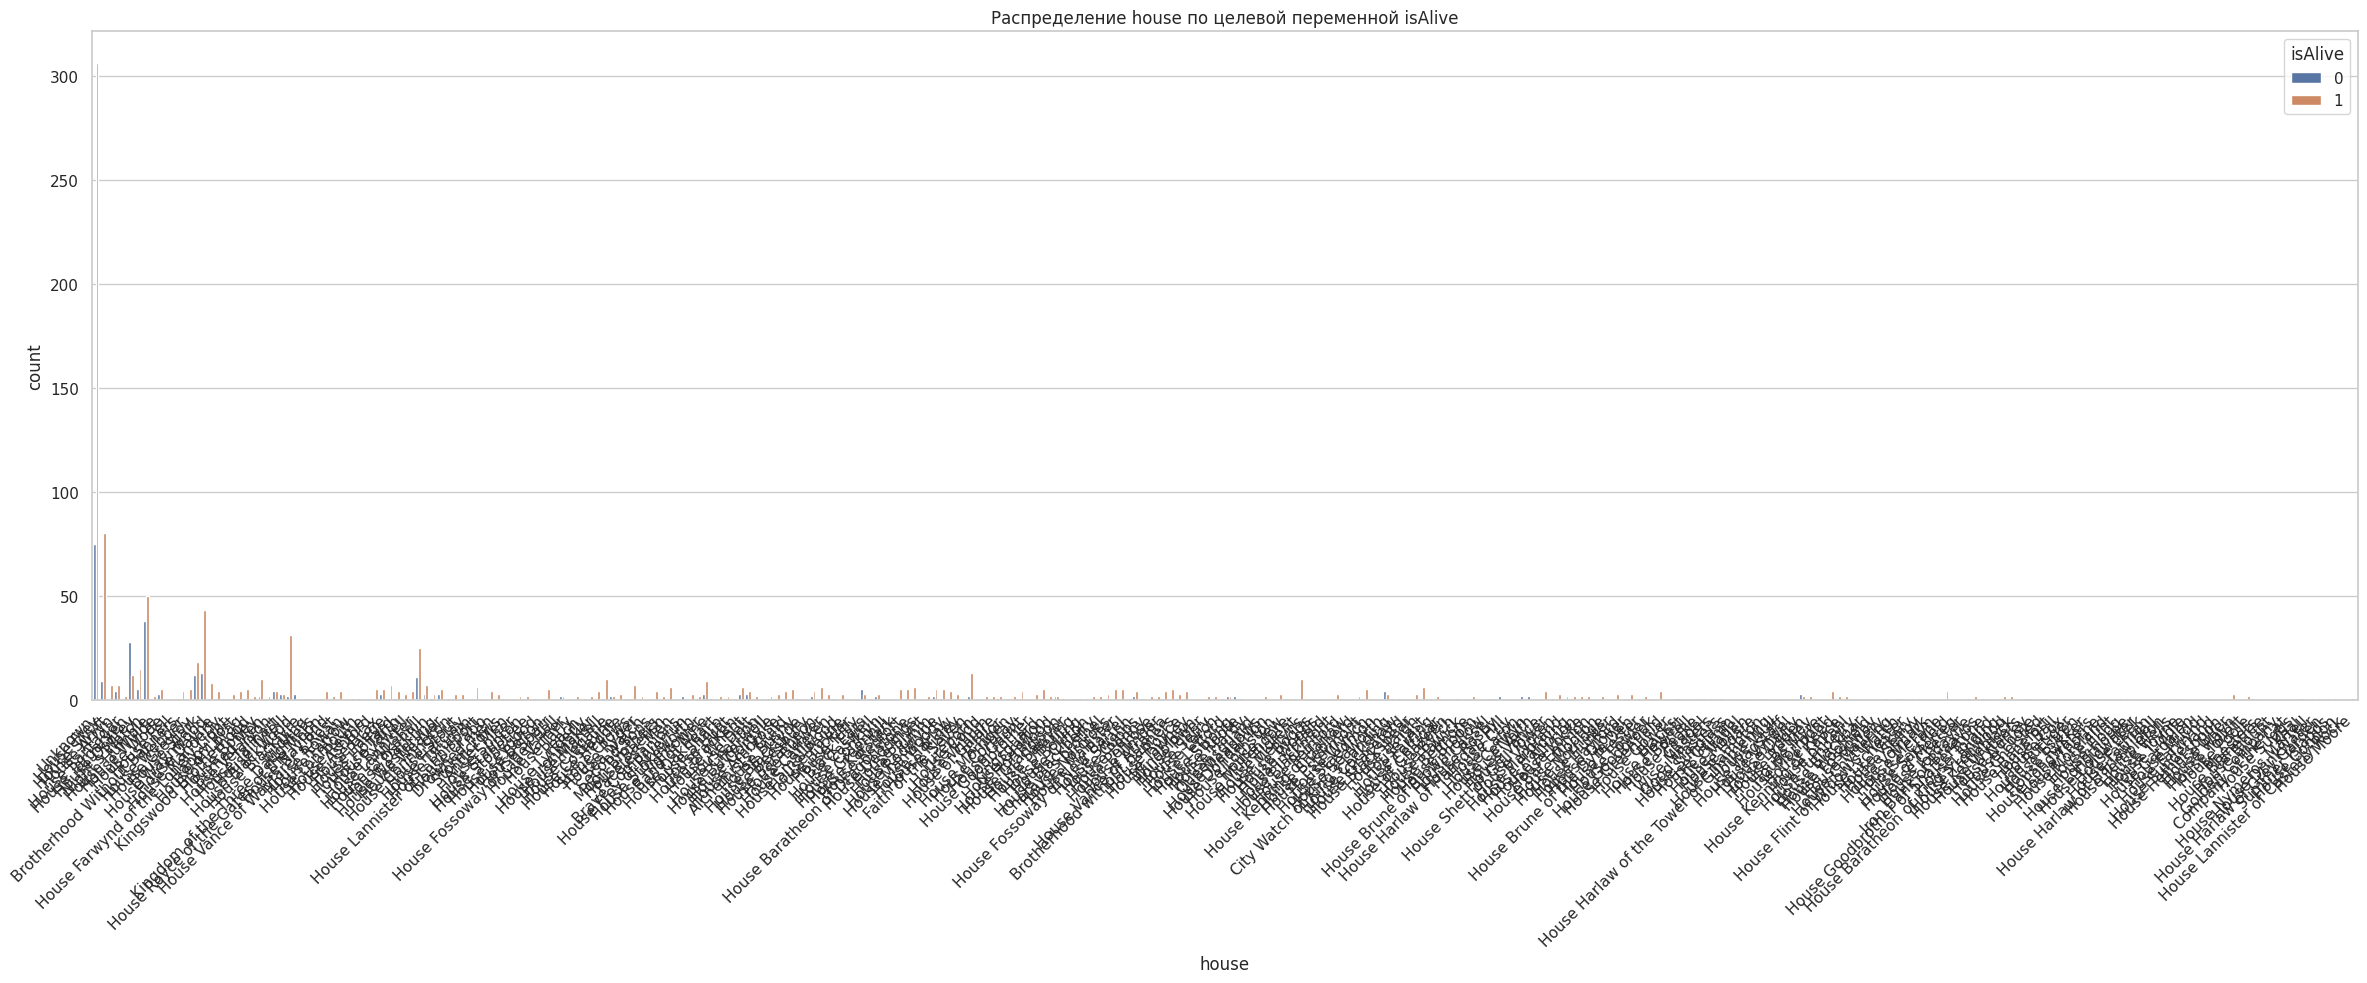

In [1424]:

# 2. Визуальный анализ
for col in cat_cols:
    plt.figure(figsize=(24, 10))
    # Создаем график распределения
    sns.countplot(data=baseline_pd, x=col, hue='isAlive')
    plt.title(f'Распределение {col} по целевой переменной isAlive')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [1425]:
baseline_cat = baseline 

In [1426]:
baseline = baseline.to_dummies(columns=cat_cols)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [1427]:
X = baseline.drop('isAlive')
y = baseline.select('isAlive')

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [1428]:
from sklearn.model_selection import train_test_split

In [1429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [1430]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [1431]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [1432]:
y_train = y_train.to_numpy().ravel()

In [1433]:
logistic_regression = LogisticRegression(
    C=1.0,                # Параметр регуляризации (обратный к силе регуляризации)
    max_iter=1000,        # Увеличиваем максимальное число итераций
    random_state=42,      # Для воспроизводимости результатов
    solver='lbfgs'        # Оптимизационный алгоритм
)

# Шаг 2. Обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [1434]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

In [1435]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [1436]:
gpc = GaussianProcessClassifier(random_state=42)
gpc.fit(X_train, y_train)

y_pred_gpc = gpc.predict(X_test)

In [1437]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [1438]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [1439]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [1440]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [1441]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [1442]:
# Шаг 3. Предсказание на тестовых данных
y_pred_lg = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_lg)
print("Accuracy LogisticRegression: %.4f" % accuracy)

Accuracy LogisticRegression: 0.7756


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [1443]:
accuracy= accuracy_score(y_test, y_pred_ada)
print("Accuracy Adaboost : %.4f" % accuracy)
accuracy = accuracy_score(y_test, y_pred_rfc)
print('RandomForestClassifier accuracy: %.4f' % accuracy)
accuracy = accuracy_score(y_test, y_pred_gpc)
print('GaussianProcessClassifier accuracy: %.4f' %accuracy)
accuracy = accuracy_score(y_test, y_pred_gnb)
print('GaussianNB accuracy: %.4f' %accuracy)
accuracy = accuracy_score(y_test, y_pred_knn)
print('KNeighborsClassifier accuracy: %.4f' % accuracy)
accuracy = accuracy_score(y_test, y_pred_svc)
print('SVC accuracy: %.4f' % accuracy)
accuracy = accuracy_score(y_test, y_pred_dtc)
print('DecisionTreeClassifier accuracy: %.4f' % accuracy)

Accuracy Adaboost : 0.7981
RandomForestClassifier accuracy: 0.8077
GaussianProcessClassifier accuracy: 0.7788
GaussianNB accuracy: 0.4263
KNeighborsClassifier accuracy: 0.7853
SVC accuracy: 0.7788
DecisionTreeClassifier accuracy: 0.7724


In [1444]:
baseline_cat

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i32,i32
"""Unknown""",1,"""Unknown""","""Unknown""",0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
"""Lord of the Crossing""",1,"""Rivermen""","""House Frey""",1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
"""Ser""",1,"""Unknown""","""House Swyft""",0,0,0,1,0,0,1,35.290323,0,0.267559,1,0,0
"""Queen""",0,"""Unknown""","""House Arryn""",0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
"""Greenstone""",0,"""Dornish""","""House Santagar""",0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Archmaester""",1,"""Unknown""","""Unknown""",1,0,1,1,0,0,1,35.290323,0,0.160535,1,0,0
"""Unknown""",0,"""Unknown""","""Unknown""",1,1,0,0,0,0,0,35.290323,0,0.040134,0,0,0
"""Unknown""",1,"""Unknown""","""House Seaworth""",0,1,1,1,1,0,0,35.290323,0,0.076923,0,0,0


### ПРоведем дополнительные  вычисления на catboost чтобы улучшить качество модели 

#### Добавим признаков 

In [1445]:
#количеств опоявлений в книнах
baseline = baseline_cat.with_columns([
    (pl.col('book1') + pl.col('book2') + pl.col('book3') + 
     pl.col('book4') + pl.col('book5')).alias('total_book_appearances')
])

In [1446]:
# Polynomial features для числовых признаков:
baseline_cat = baseline_cat.with_columns([
    pl.col('age').pow(2).alias('age_squared'),
    pl.col('popularity').pow(2).alias('popularity_squared')
])

In [ ]:
# Признак важности титула
baseline_cat = baseline_cat.with_columns([
    pl.when(pl.col('title').str.contains('King|Queen|Prince|Princess'))
    .then(3)
    .when(pl.col('title').str.contains('Lord|Lady'))
    .then(2)
    .when(pl.col('title').str.contains('Ser|Knight'))
    .then(1)
    .otherwise(0)
    .alias('title_importance')
])

In [1448]:
baseline_cat = baseline_cat.with_columns([
    # Комбинация популярности и знатности
    (pl.col('popularity') * pl.col('isNoble')).alias('noble_popularity'),
    
    # Риск смерти (комбинация возраста и мертвых родственников)
    (pl.col('age') * pl.col('numDeadRelations')).alias('death_risk')
])

In [1449]:
baseline_cat = baseline_cat.with_columns([
    # Опытный персонаж (по возрасту)
    pl.when(pl.col('age') > pl.col('age').mean())
    .then(1)
    .otherwise(0)
    .alias('is_experienced'),
    
    # Много мертвых родственников
    pl.when(pl.col('numDeadRelations') > pl.col('numDeadRelations').mean())
    .then(1)
    .otherwise(0)
    .alias('has_many_dead_relations')
])

In [1450]:
# Средние характеристики по домам
house_stats = baseline_cat.group_by('house').agg([
    pl.col('popularity').mean().alias('house_avg_popularity'),
    pl.col('numDeadRelations').mean().alias('house_avg_dead'),
    pl.col('age').mean().alias('house_avg_age')
])

# Присоединяем к основному датасету
baseline_cat = baseline_cat.join(house_stats, on='house', how='left')

проверим accuracy на catboost 

In [1451]:
from catboost import CatBoostClassifier
X_cat = baseline_cat.drop('isAlive')
y_cat = baseline_cat.select('isAlive')

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

X_train_cat = X_train_cat.to_pandas()
X_test_cat = X_test_cat.to_pandas()
y_train_cat = y_train_cat.to_numpy().ravel()
y_test_cat = y_test_cat.to_numpy().ravel()
cat_features = baseline_cat.select(cs.string()).columns


catboost_model = CatBoostClassifier(
    iterations=100,          # количество деревьев
    random_seed=42,         # фиксируем генератор случайных чисел
    learning_rate=0.1,      # скорость обучения
    depth=6,            # глубина деревьев
    cat_features=cat_features, 
    verbose=False           # отключаем вывод процесса обучения
)

# Обучаем модель
catboost_model.fit(X_train_cat, y_train_cat)

# Делаем предсказания
y_pred_catboost = catboost_model.predict(X_test_cat)


In [1452]:

accuracy = accuracy_score(y_test_cat, y_pred_catboost)
print("Accuracy CatBoost: %.4f" % accuracy)

Accuracy CatBoost: 0.8109


подберем гиперпараметры с помощью Optuna 

In [1453]:
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

# Преобразуем категориальные признаки в список индексов
cat_features_indices = [X_train_cat.columns.get_loc(col) for col in cat_features]

def objective(trial):
    # Определяем пространство поиска
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_seed': 42,
        'verbose': False
    }
    
    # Создаем Pool объекты для правильной обработки категориальных признаков
    train_pool = Pool(
        data=X_train_cat,
        label=y_train_cat,
        cat_features=cat_features_indices
    )
    
    test_pool = Pool(
        data=X_test_cat,
        label=y_test_cat,
        cat_features=cat_features_indices
    )
    
    # Создаем и обучаем модель
    model = CatBoostClassifier(**param)
    model.fit(train_pool, verbose=False)
    
    # Делаем предсказания
    y_pred = model.predict(test_pool)
    
    return accuracy_score(y_test_cat, y_pred)

# Создаем исследование
study = optuna.create_study(direction='maximize')

# Запускаем оптимизацию
study.optimize(objective, n_trials=100)

# Выводим результаты
print("Лучшие параметры:", study.best_params)
print("Лучшее значение accuracy:", study.best_value)

# Создаем финальную модель с лучшими параметрами
best_params = study.best_params
best_params.update({
    'random_seed': 42,
    'cat_features': cat_features_indices
})


best_model = CatBoostClassifier(**best_params)
train_pool = Pool(data=X_train_cat, label=y_train_cat, cat_features=cat_features_indices)
test_pool = Pool(data=X_test_cat, label=y_test_cat, cat_features=cat_features_indices)

best_model.fit(train_pool, verbose=False)
y_pred_best = best_model.predict(test_pool)

print("Финальная accuracy:", accuracy_score(y_test_cat, y_pred_best))

[I 2025-02-15 22:26:58,170] A new study created in memory with name: no-name-b68de87f-5be4-4c5d-b6aa-1375dc13ebef
[I 2025-02-15 22:26:58,999] Trial 0 finished with value: 0.8108974358974359 and parameters: {'iterations': 251, 'learning_rate': 0.10984191405238725, 'depth': 8, 'l2_leaf_reg': 0.0005021403841055049, 'min_child_samples': 27}. Best is trial 0 with value: 0.8108974358974359.
[I 2025-02-15 22:26:59,679] Trial 1 finished with value: 0.7756410256410257 and parameters: {'iterations': 227, 'learning_rate': 0.29160901643440285, 'depth': 8, 'l2_leaf_reg': 1.1704629925300702e-07, 'min_child_samples': 5}. Best is trial 0 with value: 0.8108974358974359.
[I 2025-02-15 22:27:00,626] Trial 2 finished with value: 0.8044871794871795 and parameters: {'iterations': 647, 'learning_rate': 0.19407063278761663, 'depth': 5, 'l2_leaf_reg': 4.503777618254033e-07, 'min_child_samples': 23}. Best is trial 0 with value: 0.8108974358974359.
[I 2025-02-15 22:27:01,999] Trial 3 finished with value: 0.79166

Лучшие параметры: {'iterations': 533, 'learning_rate': 0.045797403790441074, 'depth': 7, 'l2_leaf_reg': 0.2695347582245823, 'min_child_samples': 64}
Лучшее значение accuracy: 0.8333333333333334
Финальная accuracy: 0.8333333333333334


Выберите лучшую модель.

### Файл `submission.csv`

In [1621]:
test = pl.read_csv('game_of_thrones_test.csv')

In [1622]:
test = test.drop(['S.No','name','dateOfBirth', 'mother', 'father', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'heir'])

In [1623]:
test.select(pl.col('age').min())

age
f64
-298001.0


In [1624]:
test = test.with_columns(
    pl.when(pl.col('age') < 0).then(0).otherwise(pl.col('age')).alias('age')
)

In [1625]:
test.shape

(389, 14)

In [1626]:
test.select(pl.all().is_null()).sum()

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
168,0,200,46,0,0,0,0,0,0,0,235,0,0


In [1627]:
test.sample()

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64
null,1,null,"""House Crabb""",0,0,0,1,0,0,0,null,0,0.070234


In [1628]:
test = test.with_columns(
    pl.when(pl.col('popularity') > 0.5)
    .then(1)
    .otherwise(0)
    .alias('isPopular')
).with_columns(
    pl.when(pl.col('numDeadRelations') > 0)
    .then(1)
    .otherwise(0)
    .alias('boolDeadRelations')
)

In [1629]:
test = (test.join(df,
              left_on=pl.col('culture').str.to_lowercase(), 
              right_on='variants',
              how='left')
 .with_columns(
     pl.when(pl.col('culture_right').is_null())
     .then(pl.col('culture'))
     .otherwise(pl.col('culture_right'))
     .alias('culture')
 )
 ).drop(['culture_right', 'variants'])

In [1630]:
test = test.with_columns(
    pl.col('title').fill_null('Unknown').alias('title'),
    pl.col('culture').fill_null('Unknown').alias('culture'),
    pl.col('house').fill_null('Unknown').alias('house'), 
    pl.col('age').fill_null(pl.col('age').mean()).alias('age'),
)

In [1631]:
test = test.with_columns([
    (pl.col('book1') + pl.col('book2') + pl.col('book3') + 
     pl.col('book4') + pl.col('book5')).alias('total_book_appearances')
])

In [1632]:
# Polynomial features для числовых признаков:
test = test.with_columns([
    pl.col('age').pow(2).alias('age_squared'),
    pl.col('popularity').pow(2).alias('popularity_squared')
])

In [1633]:
# Признак важности титула
test = test.with_columns([
    pl.when(pl.col('title').str.contains('King|Queen|Prince|Princess'))
    .then(3)
    .when(pl.col('title').str.contains('Lord|Lady'))
    .then(2)
    .when(pl.col('title').str.contains('Ser|Knight'))
    .then(1)
    .otherwise(0)
    .alias('title_importance')
])

In [1634]:
test = test.with_columns([
    # Комбинация популярности и знатности
    (pl.col('popularity') * pl.col('isNoble')).alias('noble_popularity'),
    
    # Риск смерти (комбинация возраста и мертвых родственников)
    (pl.col('age') * pl.col('numDeadRelations')).alias('death_risk')
])

In [1635]:
test = test.with_columns([
    # Опытный персонаж (по возрасту)
    pl.when(pl.col('age') > pl.col('age').mean())
    .then(1)
    .otherwise(0)
    .alias('is_experienced'),
    
    # Много мертвых родственников
    pl.when(pl.col('numDeadRelations') > pl.col('numDeadRelations').mean())
    .then(1)
    .otherwise(0)
    .alias('has_many_dead_relations')
])

In [1636]:
# Средние характеристики по домам
house_stats = test.group_by('house').agg([
    pl.col('popularity').mean().alias('house_avg_popularity'),
    pl.col('numDeadRelations').mean().alias('house_avg_dead'),
    pl.col('age').mean().alias('house_avg_age')
])

# Присоединяем к основному датасету
test = test.join(house_stats, on='house', how='left')

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [1637]:
test

title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations,total_book_appearances,age_squared,popularity_squared,title_importance,noble_popularity,death_risk,is_experienced,has_many_dead_relations,house_avg_popularity,house_avg_dead,house_avg_age
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i32,i32,i64,f64,f64,i32,f64,f64,i32,i32,f64,f64,f64
"""Unknown""",0,"""Unknown""","""House Blackwood""",0,0,0,0,1,0,0,100.0,0,0.050167,0,0,1,10000.0,0.002517,0,0.0,0.0,1,0,0.135452,0.0,69.551948
"""Unknown""",0,"""Asshai""","""R'hllor""",0,1,1,1,1,0,0,39.103896,0,0.745819,1,0,4,1529.114691,0.556247,0,0.0,0.0,0,0,0.434783,0.0,39.103896
"""Unknown""",0,"""Unknown""","""Brotherhood without banners""",0,0,1,1,0,0,0,39.103896,0,0.010033,0,0,2,1529.114691,0.000101,0,0.0,0.0,0,0,0.05829,0.0,42.80334
"""Ser""",1,"""Unknown""","""House Trant""",1,1,1,1,1,0,1,39.103896,0,0.220736,0,0,5,1529.114691,0.048724,1,0.220736,0.0,0,0,0.220736,0.0,39.103896
"""Unknown""",1,"""Riverlands""","""House Frey""",1,1,1,1,1,1,0,38.0,0,0.434783,0,0,5,1444.0,0.189036,0,0.0,0.0,0,0,0.201087,0.875,38.887987
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Unknown""",1,"""Westerosi""","""House Stark""",1,1,1,1,1,0,0,39.103896,0,0.351171,0,0,5,1529.114691,0.123321,0,0.0,0.0,0,0,0.365385,2.4375,33.989448
"""Unknown""",1,"""Unknown""","""House Bolton""",0,1,0,1,1,0,0,39.103896,0,0.09699,0,0,3,1529.114691,0.009407,0,0.0,0.0,0,0,0.187769,0.142857,36.931354
"""Unknown""",1,"""Unknown""","""Unknown""",1,1,1,1,1,0,0,39.103896,0,0.0301,0,0,5,1529.114691,0.000906,0,0.0,0.0,0,0,0.19049,0.717391,36.118012


In [1638]:
test.select(cs.string()).columns

['title', 'culture', 'house']

In [1639]:


from catboost import Pool

cat_features = test.select(cs.string()).columns

# Создаем Pool для тестовых данных
final_test_pool = Pool(
    data=test.to_pandas(), 
    cat_features=cat_features_indices
)

# Делаем предсказание с уже обученной моделью
final_predictions = best_model.predict(final_test_pool)

In [1640]:
submission = pd.read_csv('submission.csv')
submission.head()


,S.No,isAlive
0,1558,0
1,1559,0
2,1560,0
3,1561,0
4,1562,0


In [1641]:
submission['isAlive'] = final_predictions
submission.to_csv('submission.csv', index=False)

In [1642]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [1643]:
submission = pd.read_csv("submission.csv")

In [1644]:
submission

,S.No,isAlive
0,1558,1
1,1559,1
2,1560,1
3,1561,1
4,1562,1
...,...,...
384,1942,1
385,1943,1
386,1944,1
387,1945,1


Как сохранить измененный Pandas DataFrame в csv файл: